In [1]:
! pip install transformers
! pip install datasets

In [2]:
pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

In [3]:
!pip install transformers datasets peft accelerate bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [4]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq
from datasets import load_dataset


In [5]:
model_id = "google/byt5-base"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSeq2SeqLM.from_pretrained(model_id)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.59k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/721 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.50k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [7]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("drive/MyDrive/ai/typo_switch_eng.csv")
df1 = pd.read_csv("drive/MyDrive/ai/merged.csv")


In [8]:
df1.rename(columns={'sentence': 'targets'}, inplace=True)
df1.rename(columns={'eng_sentence': 'typo'}, inplace=True)
df1.head()

,targets,typo
0,ช่วยส่งไฟล์Excelมาให้ผมหน่อยได้ไหมครับ,"ช่วยส่งไฟล์Excel,k.shz,sojvpwfhws,8iy["
1,ขอเซลฟี่Selfieสักรูปได้ไหม,"ขอเซลฟี่Selfielydi^xwfhws,"
2,วันนี้เราจะhave lunchที่caféแถวนี้กัน,วันนี้เราจะhave lunchmujcaféc5;ouhdyo
3,อยากลองpizzaหน้านี้ในเมนูใหม่,"อยากลองpizzasohkouh.og,o^.s,j"
4,ซื้อbuy one get one freeที่ร้านนี้คุ้มมาก,"ซื้อbuy one get one freemujihkoouh86h,,kd"


In [9]:

import pandas as pd
merged_df = pd.concat([df, df1], ignore_index=True)

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48253 entries, 0 to 48252
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inputs        40000 non-null  object
 1   targets       48253 non-null  object
 2   typo_message  40000 non-null  object
 3   typo          48253 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [11]:
df = merged_df.drop(columns=['inputs', 'typo_message'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48253 entries, 0 to 48252
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   targets  48253 non-null  object
 1   typo     48253 non-null  object
dtypes: object(2)
memory usage: 754.1+ KB


In [12]:
df_20k = df.sample(n=10000, random_state=42).reset_index(drop=True)

In [13]:
df_20k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   targets  10000 non-null  object
 1   typo     10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [14]:
df_20k.head()

,targets,typo
0,รับหิ้วสินค้าแบรนด์ #beautycottage ไม่คิดค่าหิ...,"รับหิ้วสินค้าแบรนด์ #beautycottage w,j8bf8jksb..."
1,รูปนี้ รู้สึกมีความสุขมาก ๆอีกเหมือนกัน เพราะน...,รูปนี้ รู้สึกมีความสุขมากๆอีกเหมือนกัน เพราะนี...
2,คนทักซ้ำคือนายานา แล้วก็ตอนเธอให้รหัสแอคมา ให้...,คนทักซ้ำคือนายานา แล้วก็ตเรเธอให้รหัสแอคมา ให้...
3,สังเกตหลายที่แล้วแหละ ไม่รู้คิดมากไปไหม เวลามี...,สังเกตหลายที่แล้วแหละ ไม่รู้คิดมากไปมั้ย เวลาม...
4,#CinderellaAndTheSecretPrince #ซินเดอเรลล่ากับ...,#CinderellaAndTheSecretPrince #Kbogfvgi]]jkdy[...


In [15]:
train, temp = train_test_split(df_20k, test_size=0.3, random_state=42)
val, test = train_test_split(temp, test_size=0.5, random_state=42)
train.to_csv("train.csv", index=False)
val.to_csv("val.csv", index=False)
test.to_csv("test.csv", index=False)

In [16]:
from datasets import load_dataset
dataset = {
    "train":      "train.csv",
    "val":        "val.csv",
    "test":       "test.csv"
}
raw_datasets = load_dataset("csv", data_files=dataset)

print(raw_datasets["train"][0])
raw_datasets

Generating train split: 0 examples [00:00, ? examples/s]

Generating val split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

{'targets': 'รีวิวของที่จำเป็นสำหรับคนที่ไม่สบายบ่อย ๆของฉันนี่แหละค่ะ ก็ไม่มีอะไรมาก 1.วิคส์ ช่วยบรรเทาอาการคัดจมูกได้ดีกว่ายาดมเยอะเลย ทาจมูก หน้าอก และหลัง 2.กระป๋องน้ำส่วนตัวเพราะกินน้ำแก้วเดียวกับคนอื่นไม่ได้ 3.กระดาษทิชชู 4.หลอดสำหรับผู้ที่ต้องกินน้ำแก้วเดียวกับคนอื่น ก็ต้องใช้หลอด', 'typo': 'รีวิวของที่จำเป็นสำหรับครที่ไม่สบายบ่อยๆของชั้นนี้แหละค่า ก็ไมีมีอะไรมาก 1.วิคส์ ช่วยบรรเทาอาการคัดจมูกได้ดีกว่ายาดมเยอะเลย ทาจมูก หน้าอก และหลัง 2.กระป๋องน้ำส่วนตัวเพราะกินน้ำแก้ว้เร๋บใกับครอื่นไม่ได้ 3.กระดาษทิชชู่ 4.หลอดสำหรับผู้ที่ต้องกินน้ำแก้วเดี๋ยวกับคนอื่น ก็ต้องใช้หลอด'}


DatasetDict({
    train: Dataset({
        features: ['targets', 'typo'],
        num_rows: 7000
    })
    val: Dataset({
        features: ['targets', 'typo'],
        num_rows: 1500
    })
    test: Dataset({
        features: ['targets', 'typo'],
        num_rows: 1500
    })
})

In [17]:
def preprocess_fun(text):
    model_inputs = tokenizer(text["typo"],text_target=text["targets"], max_length=512, truncation=True)
    return model_inputs

In [18]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)


In [19]:
tokenized_datasets = raw_datasets.map(
    preprocess_fun,
    batched=True,
)
tokenized_datasets

Map:   0%|          | 0/7000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['targets', 'typo', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 7000
    })
    val: Dataset({
        features: ['targets', 'typo', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 1500
    })
    test: Dataset({
        features: ['targets', 'typo', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 1500
    })
})

In [24]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    logging_strategy="epoch",
    save_strategy="epoch",
    logging_steps=5,
    report_to="tensorboard",
    learning_rate=3e-4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    predict_with_generate=True,
)


In [25]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],         # ชุด train
    eval_dataset=tokenized_datasets["val"],     # ชุด validation
    data_collator=data_collator,
    tokenizer=tokenizer,
)

<ipython-input-25-de9bfdf7d195>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [26]:
trainer.train()

# Save the fine-tuned model
# model.save_pretrained("./byt5_lora_typo_correction_finetuned")
# tokenizer.save_pretrained("./byt5_lora_typo_correction_finetuned")

Epoch,Training Loss,Validation Loss
1,0.194900,0.050921
2,0.047800,0.039089
3,0.037700,0.036073
4,0.029700,0.032635
5,0.024600,0.032391


TrainOutput(global_step=4375, training_loss=0.06691988307407924, metrics={'train_runtime': 5187.72, 'train_samples_per_second': 6.747, 'train_steps_per_second': 0.843, 'total_flos': 6.244397735156122e+16, 'train_loss': 0.06691988307407924, 'epoch': 5.0})

In [ ]:
!pip install python-Levenshtein nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 47.0 MB/s eta 0:00:00


In [ ]:
trainer.save_model("drive/MyDrive/ai/NEW_BYT5-SMALL")

In [29]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch
import pandas as pd

# model_dir = "./drive/MyDrive/ai/test"
# tokenizer = AutoTokenizer.from_pretrained(model_dir)
# model     = AutoModelForSeq2SeqLM.from_pretrained(model_dir)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)
def correct_typo(text: str) -> str:
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="longest")
    inputs = {k: v.to(model.device) for k, v in inputs.items()}
    outputs = model.generate(**inputs, max_new_tokens=512)
    tttx = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return tttx
print(correct_typo("พรุ่งนี้มี meeting dy[]^d8hk8ole8yP vpjk]n,g9iup, presentation fh;pot8iy["))#พรุ่งนี้มี meeting กับลูกค้าคนสำคัญ อย่าลืมเตรียม presentation ด้วยนะครับ
print(correct_typo("เล่นrobloxdyog5vtgrnvo"))#เล่นrobloxกันเถอะเพื่อน
print(correct_typo("ใหม่! กันแดดอัจฉริยะ UV Adapt Hya Water Sunscreen SPF50! PA!!!! xdxhv'zb;]he]7d57' 2 9jv!"))#ใหม่! กันแดดอัจฉริยะ UV Adapt Hya Water Sunscreen SPF50+ PA++++ ปกป้องผิวล้ำลึกถึง 2 ต่อ!
print(correct_typo("เล่นminecraftdyog5vtgrnvo"))#เล่นminecraftกันเถอะเพื่อน
print(correct_typo("เล่นrobloxdyog5vtgrnvo"))#เล่นrobloxกันเถอะเพื่อน
print(correct_typo("train modelgliH0py'vt-vcodesojvp"))#train modelเสร็จยังอะขอcodeหน่อย
print(correct_typo("ดู Voov ohv'0bU[[6;yoouhc]h;f^ohv'zjvo8]kpd;jkm6dq8iyh' l'lypwfhg]jogd,โ=;V 55 c9js'6fs'bfvp^jvpjk'gfup; r;d=v[5k,57'g,,g[viV8ovnjo gsFofklm6d Voov gxFoโi8vtwidyo gvk0ib'qohv'ojk0tglup8;k,i^hl7dot w]aV9y;gv',uc9j8or^f57'8ovnjo 5k,g]joqlo6dqrvwfh [k'8oa]yfvp^joyjo #JibBNK48 #BNK48"))#train modelเสร็จยังอะขอcodeหน่อย
print(correct_typo("หวัดดีเป็นไงบ้างอะkenmmYkw,57'w,Fmi,k"))

พรุ่งนี้มี meeting กับลูกค้าคนสำคัญ อย่าลืมเตรียม presentation ด้วยนะครับ
เล่นrobloxกันเถอะเพือน
ใหม่! กันแดดอัจฉริยะ UV Adapt Hya Water Sunscreen SPF50+ PA++++ ปกป้องผิวล้ำลึกถึง 2 ต่อ!
เล่นminecraftกันเถอะเพือน
เล่นrobloxกันเถอะเพือน
กำสร้างอะขอcodeหน่อย
ดู Voov น้องจิ๊บบุวันนี้แล้วดูน้องผ่อนคลายกว่าทุกๆครั้ง สงสัยได้เล่นเกมโชว์ 55 แต่หงุดหงิดอยู่อย่างเดียว พวกชอบถามถึงเม็มเบอร์คนอื่น เห็นดาสทุก Voov เป็นโรคอะไรกัน เอาจริง ๆน้องน่าจะเส
หวัดดีเป็นไงบ้างอะkenmทําไมถึงไม็ทรมา


In [30]:
trainer.save_model("drive/MyDrive/ai/BYT5-BASE")

In [28]:
!pip install python-Levenshtein nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.2 MB/s eta 0:00:00


In [49]:
import pandas as pd
from Levenshtein import distance as levenshtein_distance
from nltk.translate.bleu_score import corpus_bleu

test_df = pd.read_csv("realworld.csv")
refs = test_df["sentence"].tolist()
preds = [correct_typo(t) for t in test_df["eng_sentence"]]

#Character-Level Accuracy
total_chars = sum(len(r) for r in refs)
correct_chars = sum(
    sum(1 for a,b in zip(r,p) if a==b)
    for r,p in zip(refs,preds)
)
char_acc = correct_chars / total_chars

#Average Levenshtein Distance
avg_edit = sum(
    levenshtein_distance(r, p)
    for r,p in zip(refs,preds)
) / len(refs)

#Exact Match Accuracy
exact_match = sum(1 for r,p in zip(refs,preds) if r==p) / len(refs)

#BLEU Score
list_of_refs = [[r.split()] for r in refs]
hypotheses  = [p.split()    for p in preds]
bleu_score  = corpus_bleu(list_of_refs, hypotheses)

print(f"Character-Level Accuracy : {char_acc:.4f}")
print(f"Average Edit Distance    : {avg_edit:.2f}")
print(f"Exact Match Accuracy     : {exact_match:.4f}")
print(f"BLEU Score               : {bleu_score:.4f}")

Character-Level Accuracy : 0.5175
Average Edit Distance    : 17.08
Exact Match Accuracy     : 0.0962
BLEU Score               : 0.1251


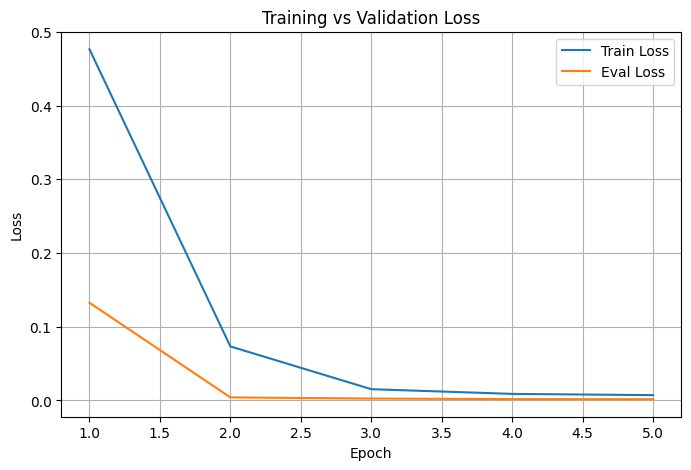

In [ ]:
logs = trainer.state.log_history
train_losses = [x['loss'] for x in logs if 'loss' in x and 'epoch' in x and 'eval_loss' not in x]
val_losses   = [x['eval_loss'] for x in logs if 'eval_loss' in x]
epochs = list(range(1, len(train_losses) + 1))
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses,   label='Eval Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training    Validation Loss')
plt.legend()
plt.grid(True)
plt.show()